In [2]:
# Load and display the data
import pandas as pd
file_path = "/Users/elchulito/Library/CloudStorage/OneDrive-polymtlus/0 - A_Database and methodology_PhD/PlasticFADE.xlsx"
sheet_name = "Elena2023"
data = pd.read_excel(file_path, sheet_name=sheet_name, usecols='A,G:L', skiprows=1, nrows=15)
pd.set_option('display.float_format', '{:.2e}'.format)
print(data)

   Polymer & Size & Shape  k_fast [d-1]  k_medium [d-1]  k_slow [d-1]  \
0     PP, 1000 μm, sphere      1.67e-04        2.70e-05      4.38e-06   
1      PP, 100 μm, sphere      1.67e-03        2.70e-04      4.38e-05   
2       PP, 10 μm, sphere      1.67e-02        2.70e-03      4.38e-04   
3     PS, 1000 μm, sphere      2.19e-05        6.93e-07      2.19e-08   
4      PS, 100 μm, sphere      2.19e-04        6.93e-06      2.19e-07   
5       PS, 10 μm, sphere      2.19e-03        6.93e-05      2.19e-06   
6    PET, 1000 μm, sphere      2.30e-03        7.10e-06      2.19e-08   
7     PET, 100 μm, sphere      2.30e-02        7.10e-05      2.19e-07   
8      PET, 10 μm, sphere      2.30e-01        7.10e-04      2.19e-06   
9   HDPE, 1000 μm, sphere      2.63e-04        2.40e-06      2.19e-08   
10   HDPE, 100 μm, sphere      2.63e-03        2.40e-05      2.19e-07   
11    HDPE, 10 μm, sphere      2.63e-02        2.40e-04      2.19e-06   
12  LDPE, 1000 μm, sphere      8.33e-04        4.27

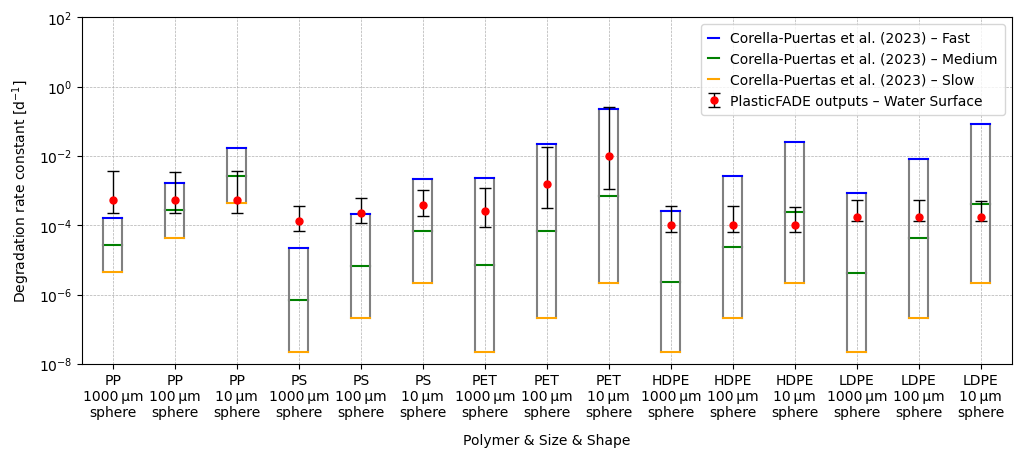

In [4]:
# Plot model outputs together with Elena's estimates
import matplotlib.pyplot as plt
import numpy as np

# Extract values & set up the plot
x = np.arange(len(data))
labels = data['Polymer & Size & Shape']
k_fast = data['k_fast [d-1]'].values
k_medium = data['k_medium [d-1]'].values
k_slow = data['k_slow [d-1]'].values
k_WS = data['k_WS [d-1]'].values
k_WS_LL = data['k_WS_LL [d-1]'].values
k_WS_UL = data['k_WS_UL [d-1]'].values
fig, ax = plt.subplots(figsize=(12, 4.5))
bar_width = 0.3

# Plot hollow boxes: lower (orange), upper (blue), with green shared boundary at k_medium
for i in range(len(x)):
    bottom1 = k_slow[i]
    mid = k_medium[i]
    top2 = k_fast[i]

    # Lower box: from k_slow to k_medium
    ax.plot([x[i] - bar_width / 2, x[i] - bar_width / 2], [bottom1, mid], color='grey')
    ax.plot([x[i] + bar_width / 2, x[i] + bar_width / 2], [bottom1, mid], color='grey')
    ax.plot([x[i] - bar_width / 2, x[i] + bar_width / 2], [bottom1, bottom1], color='orange')
    
    # Shared boundary at k_medium: green line
    ax.plot([x[i] - bar_width / 2, x[i] + bar_width / 2], [mid, mid], color='green')

    # Upper box: from k_medium to k_fast
    ax.plot([x[i] - bar_width / 2, x[i] - bar_width / 2], [mid, top2], color='grey')
    ax.plot([x[i] + bar_width / 2, x[i] + bar_width / 2], [mid, top2], color='grey')
    ax.plot([x[i] - bar_width / 2, x[i] + bar_width / 2], [top2, top2], color='blue')


# Plot k_WS with error bars
yerr = [k_WS - k_WS_LL, k_WS_UL - k_WS]
errorbar_plot = ax.errorbar(x, k_WS, yerr=yerr, fmt='o', color='red', ecolor='black',
            elinewidth=1, capsize=4, markersize=5, label='PlasticFADE outputs – Water Surface')

# Show the outliers (outside the plot boundary)
y_max = 1e+2
label_y = y_max * 10**0.3  # X% above the plot top
for i in range(len(x)):
    upper = data['k_WS_UL [d-1]'].iloc[i]
    if upper > y_max:
        label = f"{upper:.1e}".replace("+", "")

        ax.plot(
            [i, i],              # x-coordinates
            [y_max, label_y],    # from plot top to label
            color='grey',
            linewidth=1,
            linestyle=':',
            clip_on=False
        )       

        # Draw text label
        ax.text(
            i, label_y,
            label,
            ha='center',
            va='bottom',
            color='grey',
            # fontsize=9,
            clip_on=False
        )

# Axes formatting
ax.set_xticks(x)
labels = data['Polymer & Size & Shape'].str.replace(', ', '\n').str.replace(' ', '\u2009')
ax.set_xticklabels(labels)
ax.set_xlabel('Polymer & Size & Shape', labelpad=10)
ax.set_yscale('log')
ax.set_ylabel('Degradation rate constant [d$^{-1}$]', labelpad=5)
plt.xlim(-0.5, len(x) - 0.5)  # Pull the first and last data points closer to the edge of the plot
plt.ylim(1e-8, 1e+2)  # Set y-axis limits manually
plt.grid(True, which="major", ls="--", lw=0.5)

# Custom legend handles
import matplotlib.lines as mlines
handles = [
    mlines.Line2D([], [], color='blue', label='Corella-Puertas et al. (2023) – Fast'),
    mlines.Line2D([], [], color='green', label='Corella-Puertas et al. (2023) – Medium'),
    mlines.Line2D([], [], color='orange', label='Corella-Puertas et al. (2023) – Slow'),
]
all_handles = handles + [errorbar_plot]
ax.legend(handles=all_handles, handlelength=0.8, borderpad=0.5, loc='upper right')

plt.savefig("/Users/elchulito/WSur.png", dpi=600, bbox_inches='tight')
plt.show()